# MLP CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('NeuroCardio.csv')
del df["BP value"]
df.head()

,Gender,Age,Heart rate(BPM),Heart rate variability,Respiratory rate,Mental Fatigue level,Reaction time delay,Adrenaline,Cortisol level,Stress level
0,Male,64,87,68.77,12,3.15,531.43,0.83,28.08,Very High
1,Female,64,88,83.06,26,8.52,428.84,2.71,12.95,Very High
2,Male,21,77,27.95,24,7.50,375.65,3.80,19.19,Very High
3,Male,24,71,68.80,14,3.11,318.27,0.71,8.72,High
4,Male,62,72,35.48,13,9.77,250.69,4.00,15.86,Very High


In [3]:
df=df.dropna()

In [4]:
df.columns

Index(['Gender', 'Age', 'Heart rate(BPM)', 'Heart rate variability',
       'Respiratory rate', 'Mental Fatigue level', 'Reaction time delay',
       'Adrenaline', 'Cortisol level', 'Stress level'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Gender','Stress level']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [6]:
df.head()

,Gender,Age,Heart rate(BPM),Heart rate variability,Respiratory rate,Mental Fatigue level,Reaction time delay,Adrenaline,Cortisol level,Stress level
0,1,64,87,68.77,12,3.15,531.43,0.83,28.08,2
1,0,64,88,83.06,26,8.52,428.84,2.71,12.95,2
2,1,21,77,27.95,24,7.50,375.65,3.80,19.19,2
3,1,24,71,68.80,14,3.11,318.27,0.71,8.72,0
4,1,62,72,35.48,13,9.77,250.69,4.00,15.86,2


In [7]:
x1 = df.drop(labels='Stress level', axis=1)
y1 = df.loc[:,'Stress level']

In [8]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({2: 3673, 0: 1243, 1: 84})
OVER SAMPLING DATA COUNT  :  Counter({2: 3673, 0: 3673, 1: 3673})


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  8815
NUMBER OF TEST DATASET      :  2204
TOTAL NUMBER OF DATASET    :  11019


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  8815
NUMBER OF TEST DATASET      :  2204
TOTAL NUMBER OF DATASET    :  11019


In [11]:
from sklearn.neural_network import MLPClassifier

In [12]:
MLP = MLPClassifier()
MLP.fit(x_train,y_train)

MLPClassifier()

In [13]:
predicted = MLP.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted)
print('ACCURACY OF THIS MODEL :\n\n', accuracy*100)

ACCURACY OF THIS MODEL :

 94.55535390199637


In [15]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF MLP CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF MLP CLASSIFIER:

               precision    recall  f1-score   support

           0       0.92      0.92      0.92       734
           1       0.97      1.00      0.98       735
           2       0.95      0.92      0.93       735

    accuracy                           0.95      2204
   macro avg       0.95      0.95      0.95      2204
weighted avg       0.95      0.95      0.95      2204



In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF MLP CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF MLP CLASSIFIER:


 [[673  26  35]
 [  0 735   0]
 [ 59   0 676]]


In [17]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(MLP, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [88.06715064 94.96370236 94.1923775  93.14882033 94.3259192 ]


In [18]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF MLP CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF MLP CLASSIFIER IS : 94.55535390199637


In [19]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF MLP CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF MLP CLASSIFIER IS : 5.44464609800363


THE CONFUSION MATRIX SCORE OF MLP CLASSIFIER:


[[673  26  35]
 [  0 735   0]
 [ 59   0 676]]


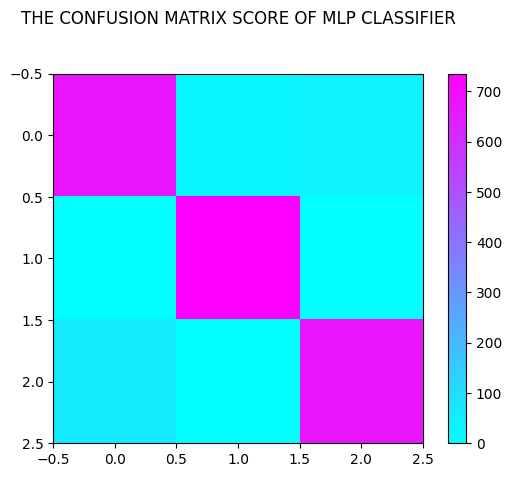

In [20]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF MLP CLASSIFIER\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF MLP CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

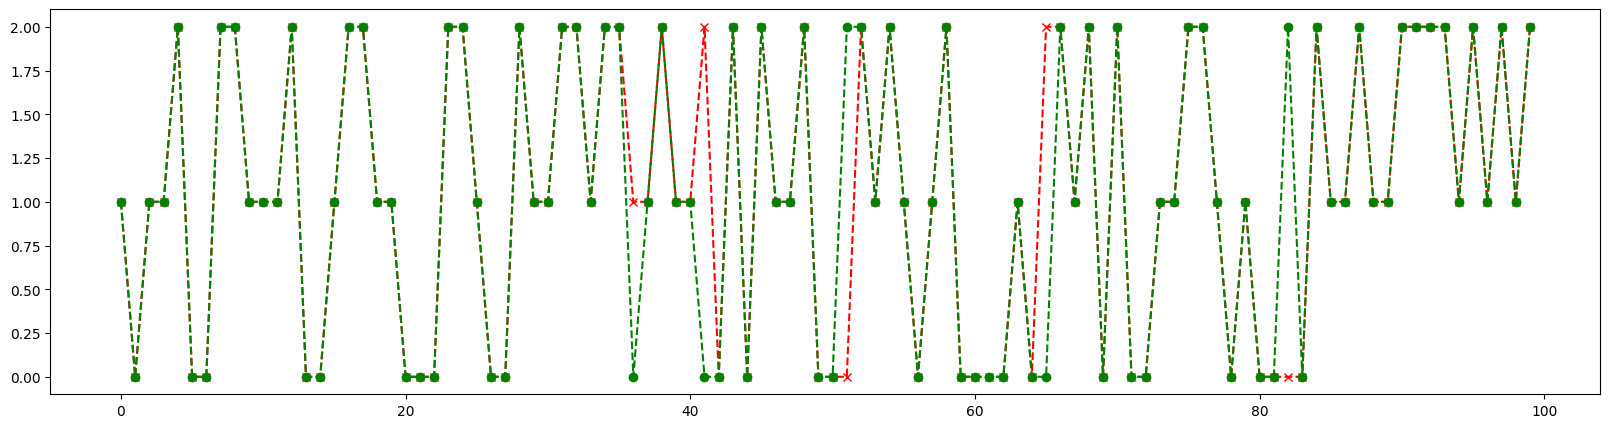

In [21]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()